In [116]:
import pandas as pd
from arch import arch_model

### Load CPU Data

In [87]:
#source: https://www.policyuncertainty.com/climate_uncertainty.html
cpu = pd.read_csv('cpu.csv', sep=',')
cpu[['date', 'cpu_index', 'old_cpu_index']] = cpu['date,cpu_index,old_cpu_index'].str.split(',', expand=True)
cpu['date']= pd.to_datetime(cpu['date'],format='%b-%y')
cpu.set_index('date', inplace=True)
cpu.drop(columns=['date,cpu_index,old_cpu_index','old_cpu_index'], inplace=True)
cpu['cpu_index'] = pd.to_numeric(cpu['cpu_index'])

In [88]:
cpu

,cpu_index
date,
1987-04-01,43.589069
1987-05-01,41.862022
1987-06-01,71.135203
1987-07-01,53.756704
1987-08-01,60.615545
...,...
2023-08-01,153.417951
2023-09-01,213.599284
2023-10-01,150.606362


<Axes: xlabel='date'>

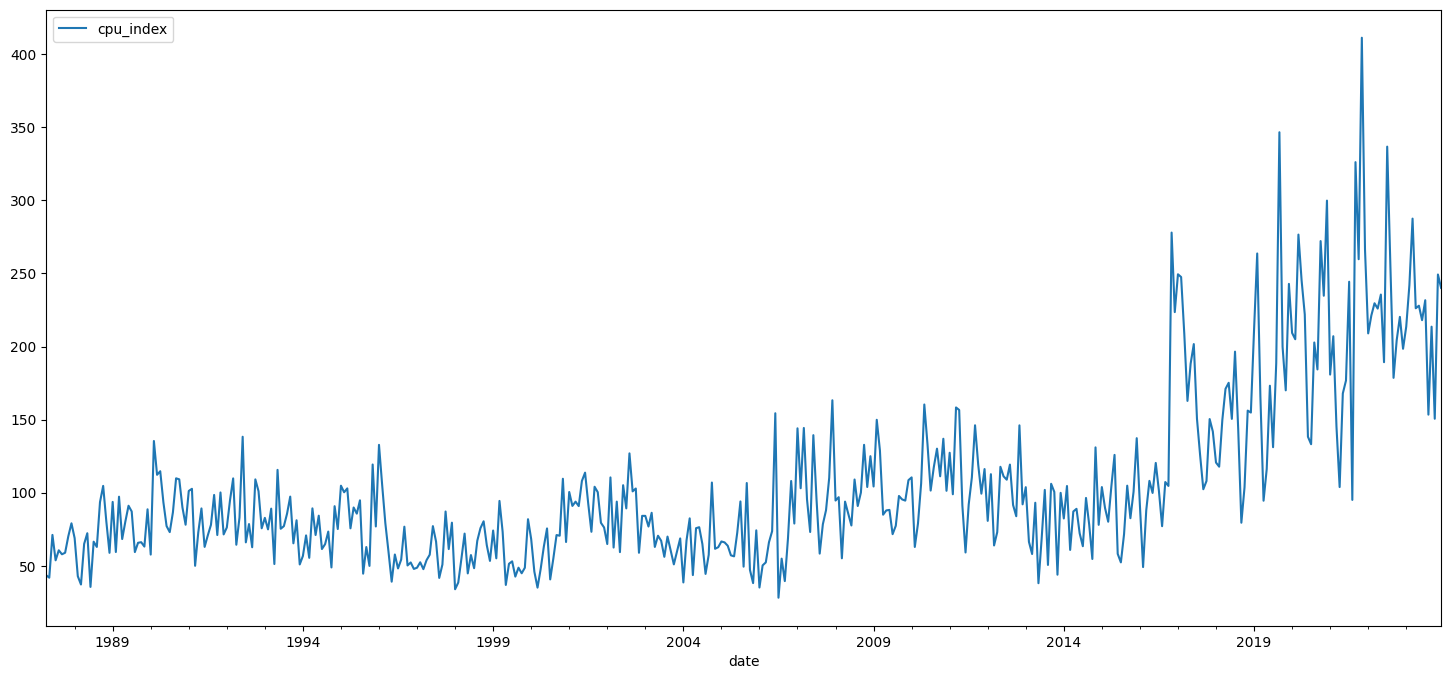

In [90]:
cpu.plot(figsize=(18,8))

### Simulated Disaster Monthly Frequencies

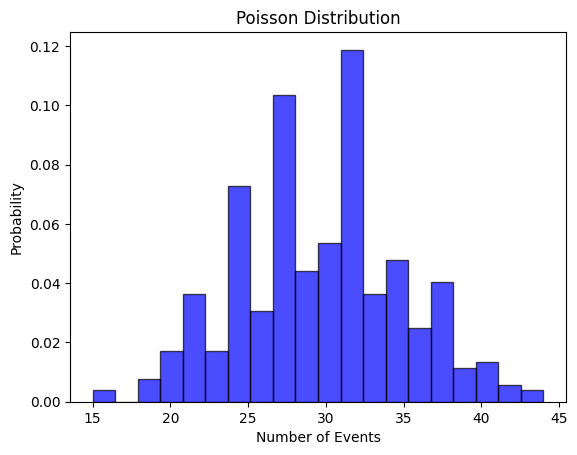

In [68]:
import numpy as np
import matplotlib.pyplot as plt

lambda_parameter = 30

events = np.random.poisson(lambda_parameter, size=30*12)

plt.hist(events, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

In [69]:
date_range = pd.date_range(start='1994-01-01', periods=30*12, freq='M')
sim_disaster_data = pd.DataFrame({'Date': date_range, 'Monthly_Disaster_Freq': events})
sim_disaster_data.set_index('Date', inplace=True)
sim_disaster_data

,Monthly_Disaster_Freq
Date,
1994-01-31,31
1994-02-28,41
1994-03-31,32
1994-04-30,31
1994-05-31,24
...,...
2023-08-31,31
2023-09-30,39
2023-10-31,25


<Axes: xlabel='Date'>

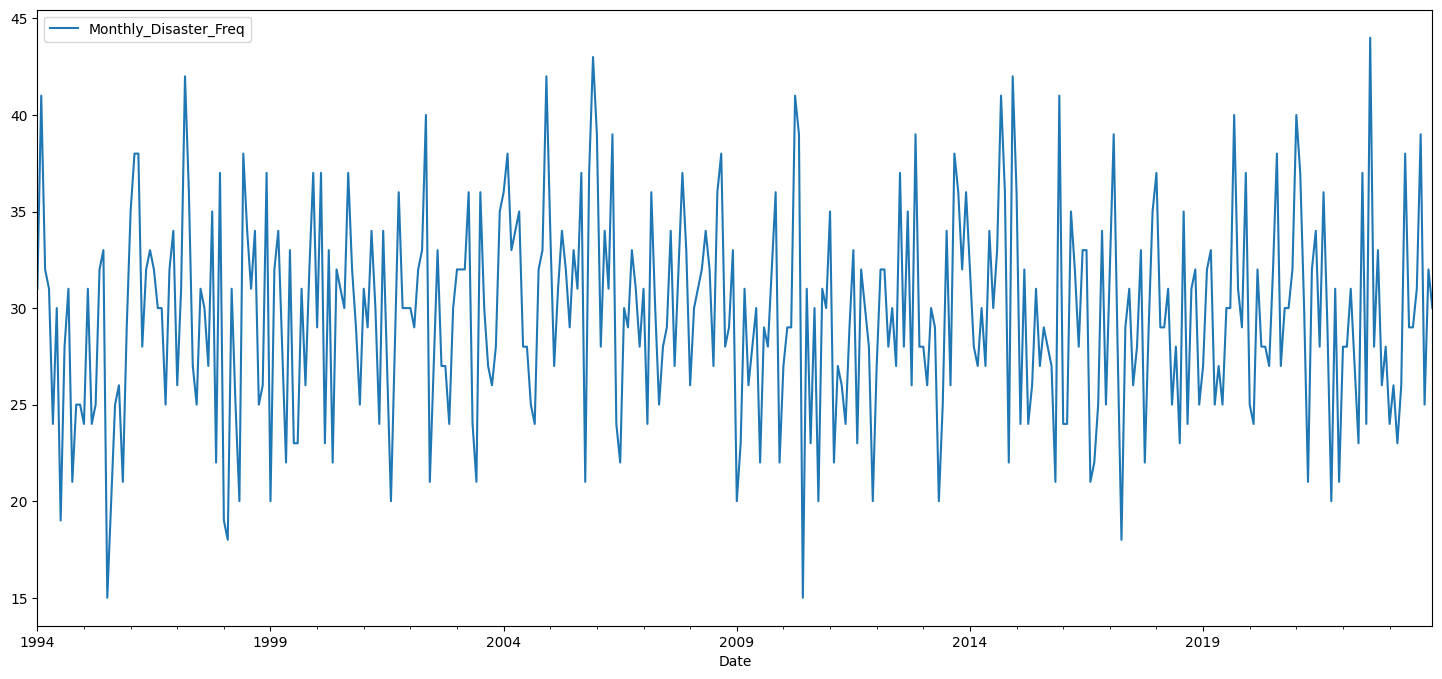

In [70]:
sim_disaster_data.plot(figsize=(18,8))

In [103]:
#Natural Gas Futures price
#Source: https://www.eia.gov/dnav/ng/hist/rngc1d.htm
natgas_futures = pd.read_csv('natgas_futures_price.csv', sep=',')
natgas_futures['Date']= pd.to_datetime(natgas_futures['Date'],format='%d/%m/%y')
natgas_futures.set_index('Date', inplace=True)
natgas_futures['daily_return'] = natgas_futures['natgas_future_price'].pct_change()
natgas_futures

,natgas_future_price,daily_return
Date,,
1994-01-13,2.194,NaN
1994-01-14,2.268,0.033728
1994-01-17,2.360,0.040564
1994-01-18,2.318,-0.017797
1994-01-19,2.252,-0.028473
...,...,...
2024-01-24,2.641,0.077959
2024-01-25,2.571,-0.026505
2024-01-26,2.712,0.054842


<Axes: xlabel='Date'>

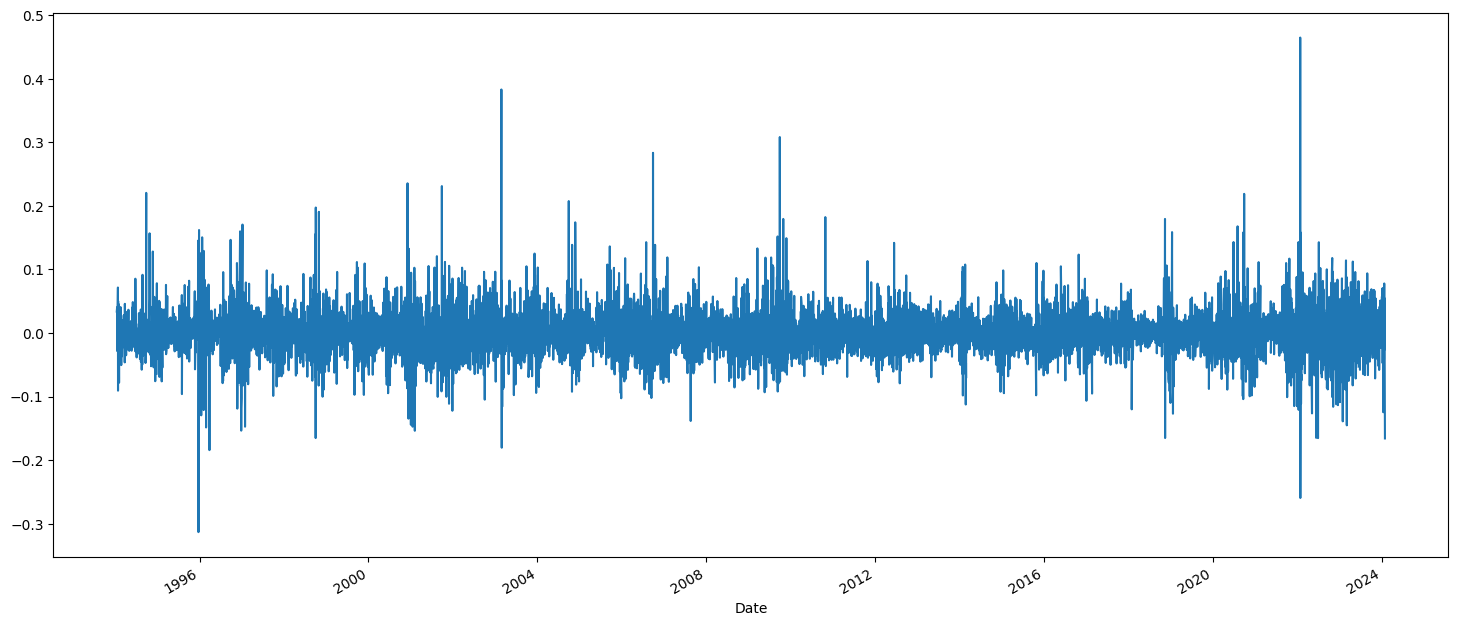

In [104]:
natgas_futures['daily_return'].plot(figsize=(18,8))

#### Aligning data to same window 01-94 to 12-23

In [106]:
natgas_futures

,natgas_future_price,daily_return
Date,,
1994-01-13,2.194,NaN
1994-01-14,2.268,0.033728
1994-01-17,2.360,0.040564
1994-01-18,2.318,-0.017797
1994-01-19,2.252,-0.028473
...,...,...
2024-01-24,2.641,0.077959
2024-01-25,2.571,-0.026505
2024-01-26,2.712,0.054842


In [110]:
natgas_futures_data = natgas_futures[natgas_futures.index < '1-1-2024']
natgas_futures_data

,natgas_future_price,daily_return
Date,,
1994-01-13,2.194,NaN
1994-01-14,2.268,0.033728
1994-01-17,2.360,0.040564
1994-01-18,2.318,-0.017797
1994-01-19,2.252,-0.028473
...,...,...
2023-12-22,2.610,0.014774
2023-12-26,2.550,-0.022989
2023-12-27,2.619,0.027059


In [89]:
cpu

,cpu_index
date,
1987-04-01,43.589069
1987-05-01,41.862022
1987-06-01,71.135203
1987-07-01,53.756704
1987-08-01,60.615545
...,...
2023-08-01,153.417951
2023-09-01,213.599284
2023-10-01,150.606362


In [95]:
cpu_data = cpu[cpu.index > 'Dec-93']
cpu_data

,cpu_index
date,
1994-01-01,56.733087
1994-02-01,70.789021
1994-03-01,55.449487
1994-04-01,89.294281
1994-05-01,71.074022
...,...
2023-08-01,153.417951
2023-09-01,213.599284
2023-10-01,150.606362


In [120]:
data = natgas_futures_data['daily_return']
data = data.ffill()
data = data.dropna()
model = arch_model(data, vol='Garch', p=1, q=1)
results = model.fit()

# Display the GARCH model summary
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.6324948643784026e+19
Iteration:      2,   Func. Count:     17,   Neg. LLF: -14925.670828603548
Optimization terminated successfully    (Exit mode 0)
            Current function value: -14925.670803660207
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           daily_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                14925.7
Distribution:                  Normal   AIC:                          -29843.3
Method:            Maximum Likelihood   BIC:                          -29815.6
                                        No. Observations:                 7525
Date:                Thu, Feb 01 2024   Df Residuals:                     7524
Time:   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001374. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
